# [Linear Models](https://scikit-learn.org/stable/modules/linear_model.html)

## Linear Regression Model

The following are a set of methods intended for regression in which the target value is expected to be a linear combination of the features. In mathematical notation, if is the predicted value.\
$y_{pred}(w,x) = w_{0} + w_{1}x_{1} + .... + w_{p}x_{p}$

Across the module, we designate the vector as `coef_` and as `intercept_`.

### [Ordinary Least Squares](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares)

LinearRegression fits a linear model with coefficients to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation. Mathematically it solves a problem of the form:\
$\min ||X_{w} - y||_2^2$

In [15]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

#### Load the dataset, split it and only use one feature of the dataset as inputs for simplification

In [12]:
X, y = load_diabetes(return_X_y=True)
X = X[:, [2]]  # Use only one feature
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, shuffle=False)

#### Load the `regressor` and fit it to the training data

In [13]:
regressor = LinearRegression().fit(X_train, y_train)

#### Model Evaluation

In [20]:
y_pred = regressor.predict(X_test)

print(f"Mean squared error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred):.2f}")
print(f"Coefficient estimates: {regressor.coef_}")

Mean squared error: 2548.07
Coefficient of determination: 0.47
Coefficient estimates: [938.23786125]


#### Plot the results

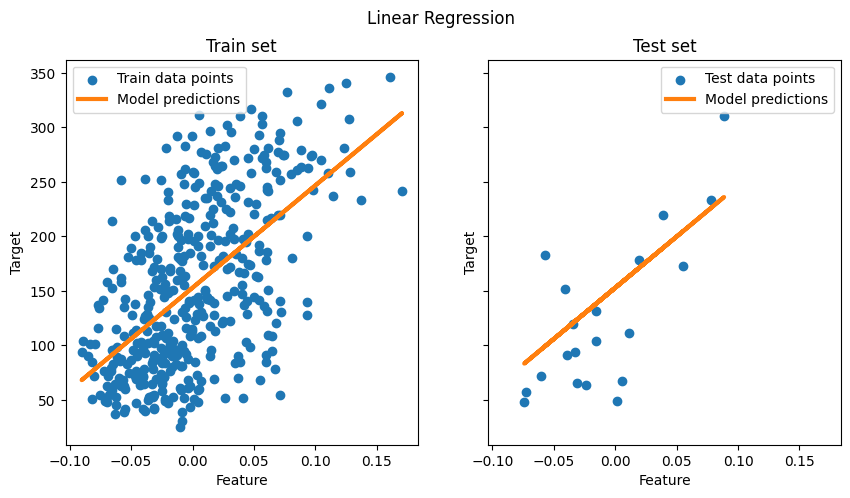

In [17]:
# Create the figure and define axes
fig, ax = plt.subplots(ncols=2, figsize=(10, 5), sharex=True, sharey=True)

# Create a scatter plot graph for the trainig dataset 
ax[0].scatter(X_train, y_train, label="Train data points")
ax[0].plot(
    X_train,
    regressor.predict(X_train),
    linewidth=3,
    color="tab:orange",
    label="Model predictions",
)
ax[0].set(xlabel="Feature", ylabel="Target", title="Train set")
ax[0].legend()

# Plot predictions
ax[1].scatter(X_test, y_test, label="Test data points")
ax[1].plot(X_test, y_pred, linewidth=3, color="tab:orange", label="Model predictions")
ax[1].set(xlabel="Feature", ylabel="Target", title="Test set")
ax[1].legend()

# Show the final figure
fig.suptitle("Linear Regression")
plt.show()

### [Non-Negative Least Squares](https://scikit-learn.org/stable/modules/linear_model.html#non-negative-least-squares)

It is possible to constrain all the coefficients to be non-negative, which may be useful when they represent some physical or naturally non-negative quantities (e.g., frequency counts or prices of goods). LinearRegression accepts a boolean positive parameter: when set to True Non-Negative Least Squares are then applied.

In [31]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#### Generating some random data

In [28]:
np.random.seed(42)
n_samples, n_features = 200, 50
X = np.random.randn(n_samples, n_features)
true_coef = 3 * np.random.randn(n_features)

# Threshold coefficients to render them non-negative
true_coef[true_coef < 0] = 0
y = np.dot(X, true_coef)

# Add some noise
y += 5 * np.random.normal(size=(n_samples,))

# print(X, y)

#### Split the data in train set and test set

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

#### Fit the Non-Negative least squares(NNLS).

In [33]:
reg_nnls = LinearRegression(positive=True)
y_pred_nnls = reg_nnls.fit(X_train, y_train).predict(X_test)
r2_score_nnls = r2_score(y_test, y_pred_nnls)
print("NNLS R2 score", r2_score_nnls)

NNLS R2 score 0.817343329331002


#### Fit an OLS.

In [34]:
reg_ols = LinearRegression()
y_pred_ols = reg_ols.fit(X_train, y_train).predict(X_test)
r2_score_ols = r2_score(y_test, y_pred_ols)
print("OLS R2 score", r2_score_ols)

OLS R2 score 0.7840882510156987


#### Comparing the R2 square coefficients for OLS and NNLS

Text(0, 0.5, 'NNLS regression coefficients')

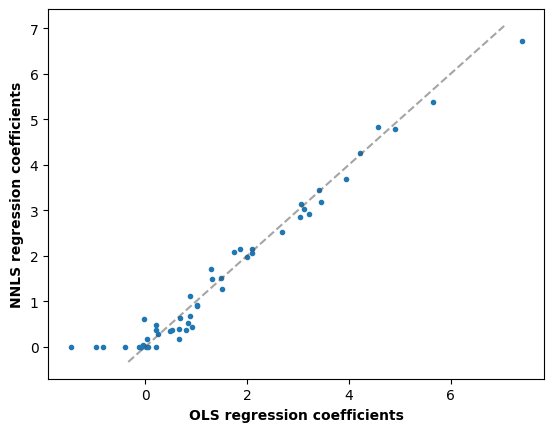

In [35]:
fig, ax = plt.subplots()
ax.plot(reg_ols.coef_, reg_nnls.coef_, linewidth=0, marker=".")

low_x, high_x = ax.get_xlim()
low_y, high_y = ax.get_ylim()
low = max(low_x, low_y)
high = min(high_x, high_y)
ax.plot([low, high], [low, high], ls="--", c=".3", alpha=0.5)
ax.set_xlabel("OLS regression coefficients", fontweight="bold")
ax.set_ylabel("NNLS regression coefficients", fontweight="bold")

The least squares solution is computed using the singular value decomposition of X. If X is a matrix of shape (n_samples, n_features) this method has a cost of $O(nsamplesn^2features)$.

##  [Ridge regression and classification Models](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression-and-classification)

### Ridge Regression

Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of the coefficients. The ridge coefficients minimize a penalized residual sum of squares:\
$min_{w} ||Xw - y||_2^2 + \alpha ||w||_2^2$

The complexity parameter aplha>=0 controls the amount of shrinkage: the larger the value of 
, the greater the amount of shrinkage and thus the coefficients become more robust to collinearity.